INFO:root:SpaCy Pipeline Components: ['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


Starting Relevancy Benchmarking: Impact of Target-to-Noise Model Density on SNS Performance...


INFO:root:Successfully connected to Neo4j.
INFO:root:Loading SentenceTransformer model...
INFO:sentence_transformers.SentenceTransformer:Use pytorch device_name: cpu
INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
C:\Users\noski\PycharmProjects\Semantic_Search_Thingiverse\.venv\Lib\site-packages\transformers\tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
INFO:root:SentenceTransformer model loaded successfully.
INFO:root:Fetching all models and their embeddings from Neo4j...
INFO:root:Fetched 991 models from Neo4j.
INFO:root:Computing embeddings for 'description_nonai'...
Embedding 'description_nonai': 100%|██████████| 16/16 [00:11<00:00,  1.39it/s]

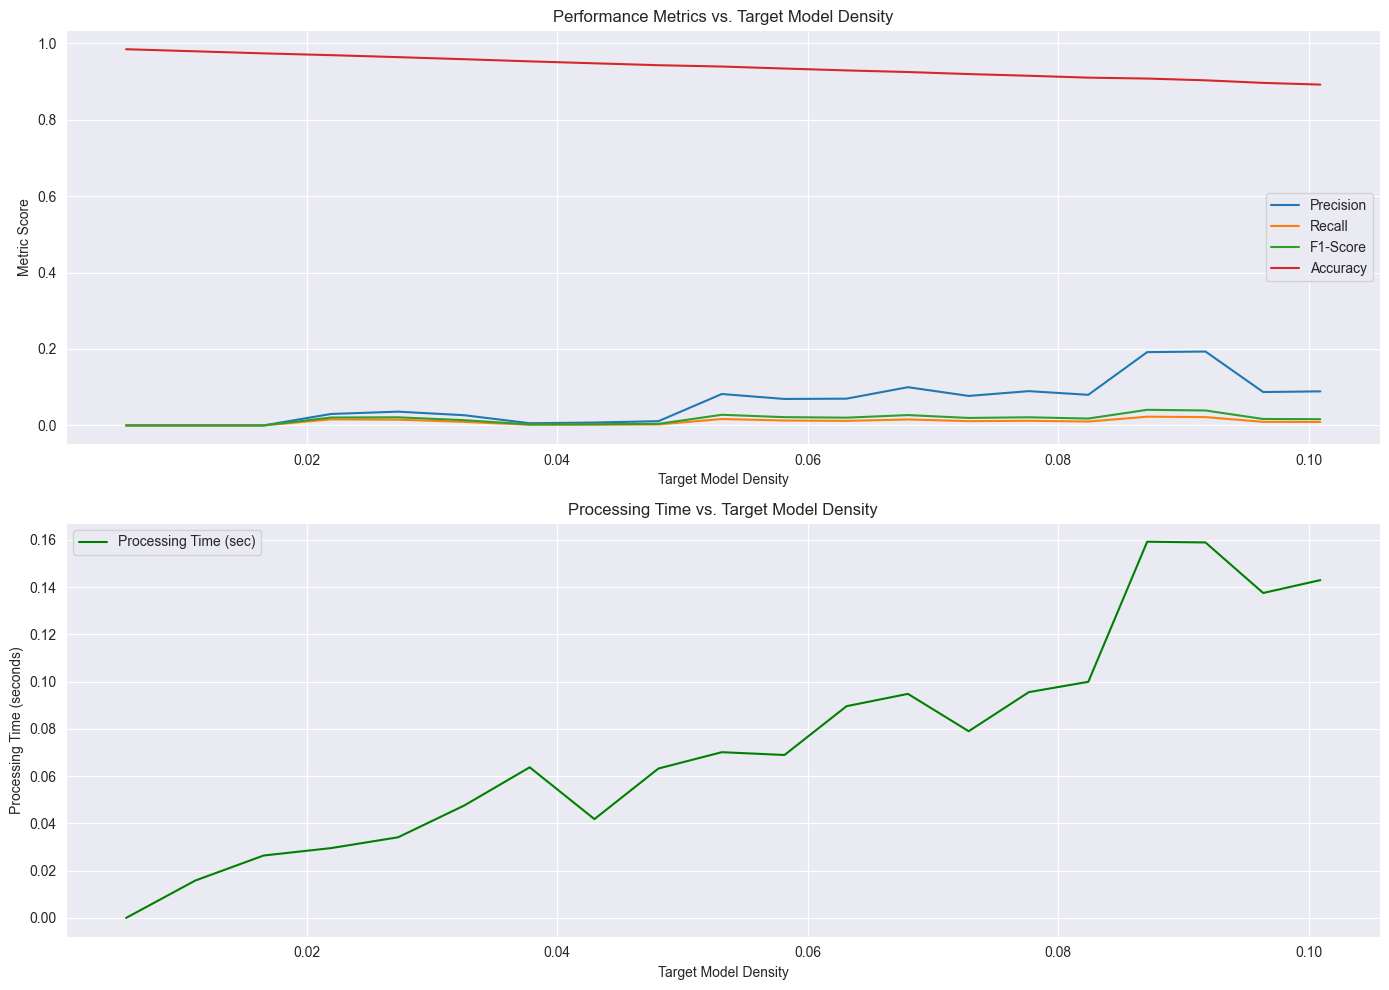


Metrics for Target Density

 Target_Model_Density  Precision   Recall  F1-Score  Accuracy  Processing_Time_sec
             0.100908   0.089089 0.008990  0.016332  0.891816             0.142993
             0.096349   0.087368 0.009295  0.016802  0.896296             0.137549
             0.091743   0.193333 0.021723  0.039057  0.903024             0.158948
             0.087090   0.191765 0.022829  0.040801  0.907618             0.159255
             0.082389   0.080100 0.010127  0.017980  0.910003             0.099948
             0.077640   0.089692 0.012072  0.021280  0.914934             0.095576
             0.072841   0.077143 0.011180  0.019530  0.919399             0.079031
             0.067992   0.100000 0.015625  0.027027  0.924686             0.094843
             0.063091   0.070000 0.011864  0.020290  0.928917             0.089635
             0.058140   0.069217 0.012795  0.021597  0.933827             0.068977
             0.053135   0.082164 0.016735  0.027806  0.939

In [10]:
# def main():
#     """
#     Main function to perform benchmarking: Impact of Target-to-Noise Model Density on SNS Performance.
#     """
#     print("Starting Relevancy Benchmarking: Impact of Target-to-Noise Model Density on SNS Performance...")
# 
#     graph_db = connect_to_neo4j(NEO4J_URI, NEO4J_USER, NEO4J_PASSWORD)
# 
#     logging.info("Loading SentenceTransformer model...")
#     model = SentenceTransformer('all-MiniLM-L6-v2')
#     logging.info("SentenceTransformer model loaded successfully.")
# 
#     df_models_master = fetch_all_models(graph_db, model)
# 
#     all_model_ids_master = set(df_models_master['id'])
# 
#     random.seed(42)
# 
#     num_initial_targets = min(100, len(df_models_master))
#     target_model_ids = set(random.sample(list(all_model_ids_master), num_initial_targets))
#     noise_model_ids = all_model_ids_master - target_model_ids
# 
#     df_models_master['is_target'] = df_models_master['id'].isin(target_model_ids)
#     df_targets = df_models_master[df_models_master['is_target']].reset_index(drop=True)
#     df_noises = df_models_master[~df_models_master['is_target']].reset_index(drop=True)
# 
#     embeddings_all = np.vstack(df_models_master['embedding_summary_nonai'])
#     id_to_index = {model_id: idx for idx, model_id in enumerate(df_models_master['id'])}
# 
#     metrics_per_density = {
#         'Target_Model_Density': [],
#         'Precision': [],
#         'Recall': [],
#         'F1-Score': [],
#         'Accuracy': [],
#         'Processing_Time_sec': []
#     }
# 
#     current_target_model_ids = deepcopy(target_model_ids)
# 
#     while len(current_target_model_ids) > 0:
#         total_models = len(current_target_model_ids) + len(noise_model_ids)
#         density = len(current_target_model_ids) / total_models
#         logging.info(f"Evaluating with Target Model Density: {density:.4f}")
#         metrics_per_density['Target_Model_Density'].append(density)
# 
#         current_model_ids = current_target_model_ids.union(noise_model_ids)
#         df_current = df_models_master[df_models_master['id'].isin(current_model_ids)].reset_index(drop=True)
# 
#         id_to_index_current = {model_id: idx for idx, model_id in enumerate(df_current['id'])}
# 
#         embeddings_current = np.vstack(df_current['embedding_summary_nonai'])
#         all_ids_current = set(df_current['id'])
# 
#         start_time = time.time()
# 
#         aggregated_metrics = {'TP': 0, 'FP': 0, 'FN': 0, 'TN': 0}
# 
#         for idx, row in tqdm(df_current[df_current['id'].isin(current_target_model_ids)].iterrows(),
#                              total=len(current_target_model_ids), desc="Processing Queries"):
#             query_id = row['id']
#             query_embedding = row['embedding_summary_nonai']
#             if query_embedding.size == 0:
#                 continue
# 
#             similarities = compute_cosine_similarity(query_embedding, embeddings_current)
# 
#             top_k = 10 
#             similar_indices = similarities.argsort()[-top_k - 1:-1][::-1]
#             retrieved_ids = set(df_current['id'].iloc[similar_indices])
#             retrieved_ids.discard(query_id)
# 
#             target_ids = current_target_model_ids - {query_id}
# 
#             evaluation = evaluate_retrieval(query_id, retrieved_ids, target_ids, all_ids_current)
# 
#             aggregated_metrics['TP'] += evaluation['TP']
#             aggregated_metrics['FP'] += evaluation['FP']
#             aggregated_metrics['FN'] += evaluation['FN']
#             aggregated_metrics['TN'] += evaluation['TN']
# 
#         end_time = time.time()
#         processing_time = end_time - start_time
# 
#         averaged_metrics = compute_metrics(aggregated_metrics)
#         averaged_metrics['Processing_Time_sec'] = processing_time
# 
#         metrics_per_density['Precision'].append(averaged_metrics['Precision'])
#         metrics_per_density['Recall'].append(averaged_metrics['Recall'])
#         metrics_per_density['F1-Score'].append(averaged_metrics['F1-Score'])
#         metrics_per_density['Accuracy'].append(averaged_metrics['Accuracy'])
#         metrics_per_density['Processing_Time_sec'].append(averaged_metrics['Processing_Time_sec'])
# 
#         if len(current_target_model_ids) >= 5:
#             removed_models = random.sample(list(current_target_model_ids), 5)
#         else:
#             removed_models = list(current_target_model_ids)
# 
#         current_target_model_ids -= set(removed_models)
# 
#         if len(current_target_model_ids) == 0:
#             logging.info("All target models have been removed from the dataset.")
#             break
# 
#     df_metrics = pd.DataFrame(metrics_per_density)
# 
#     plt.figure(figsize=(14, 10))
# 
#     plt.subplot(2, 1, 1)
#     sns.lineplot(data=df_metrics, x='Target_Model_Density', y='Precision', label='Precision')
#     sns.lineplot(data=df_metrics, x='Target_Model_Density', y='Recall', label='Recall')
#     sns.lineplot(data=df_metrics, x='Target_Model_Density', y='F1-Score', label='F1-Score')
#     sns.lineplot(data=df_metrics, x='Target_Model_Density', y='Accuracy', label='Accuracy')
#     plt.title('Performance Metrics vs. Target Model Density')
#     plt.xlabel('Target Model Density')
#     plt.ylabel('Metric Score')
#     plt.legend()
#     plt.grid(True)
# 
#     plt.subplot(2, 1, 2)
#     sns.lineplot(data=df_metrics, x='Target_Model_Density', y='Processing_Time_sec', label='Processing Time (sec)', color='green')
#     plt.title('Processing Time vs. Target Model Density')
#     plt.xlabel('Target Model Density')
#     plt.ylabel('Processing Time (seconds)')
#     plt.legend()
#     plt.grid(True)
# 
#     plt.tight_layout()
#     plt.show()
# 
#     print("\nMetrics for Target Density\n")
#     print(df_metrics.to_string(index=False))
# 
# 
# if __name__ == "__main__":
#     main()


Precision:
Precision varies across target densities, starting higher at 0.1 density (0.0741) and fluctuating with no clear upward or downward trend. For instance:
However, precision remains consistently low across all densities.

Recall:
Recall is very low overall and varies very slightly with target density. 

F1-Score:
F1-Score shows a similar fluctuating trend to precision and recall, indicating that the system almost maintains performance consistency across densities. 

These metrics are all not ideal due to the way the expected and retrieved sets were constructed. This was done for ease just to show that they metrics are relatively consistent.
So, because most metrics fluctuate, this shows that while target density does not impact performance, but it has an effect on processing time.